# Random Forest Regression

#### What is Random Forest Regression (RFR)?


Random forests or random decision forests are an ensemble learning method (In statistics and machine learning, ensemble methods use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone.) for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set.

In this exercise, we will be using a positions salary csv dataset to see how accurately we can predict the salary for each position. As always, we will begin by importing our libraries, dataset, as well as setting our vector and matrixes.

For a overview of RFR, visit the link below

`https://medium.com/@williamkoehrsen/random-forest-simple-explanation-377895a60d2d`

## Step One: Importing Libraries and Dataset

In [7]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values


## Step Two: Fitting Random Forest Regression to the Dataset

In this step we will be importing `RandomForestRegressor` from `sklearn.ensemble`.

`RandomForestRegressor` is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

While `RandomForestRegressor` method takes in many variables the two we will be working with is the `n_estimators` as well as `random_state`

`n_estimators` is simply the number of decision trees in the forest created based on the data passed in.

By setting the `random_state`, you guarantee that the (pseudo-) random number generator generates the same sequence of random integers each time, which in turn has an effect on the way your data is sampled so you will get the same results every time you run the code.

We will then create and fit the data to the Random Forest Regressor

In [9]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

## Step Three: Visualising the Results

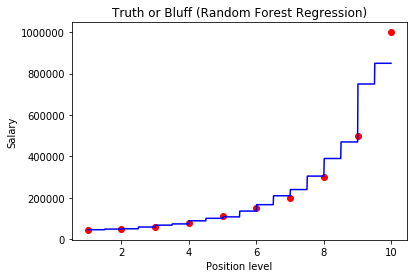

In [14]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

### So what does this mean?

So our computer took in the dataset of our X and y coordinates, and created 10 seperate decision trees. With each of those decision trees, they each made a prediction based on the training set for salary based on position level. The RFR took the mean of those predictions for all of the decision trees and that is what our graph represents. So for someone with a position level of 6, their salary would be predicted to be close to 150,000 based off of the 10 different decision trees predictions. We could increase the amount of decision trees and hopefully that would give us a closer result to actual data. We can give this a try below.

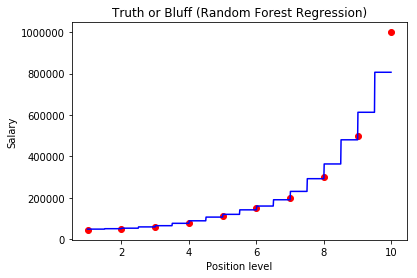

In [16]:
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X, y)

X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

So as you can see, the more decision trees that are added, the more accurate your results will be. However something to note about RFR models. RFR models can NEVER predict anything higher or lower than the maximum values provided within a dataset. The predictions will always be an average of the data provided.

## Step Four: Predicting our Result

Now it is time to see what the salary would be for someone with experience of 6.5 years would be based on our regression model.
our goal is for the value to be close to 160000

In [17]:
y_pred = regressor.predict(6.5)
print(y_pred);

[160333.33333333]
